In [5]:
import os
os.getcwd()

import sys
sys.path.append('../../')


from RumourEval2019Models.RumourDataset import RumourDataset
from RumourEval2019Models.CLEARumor.src.dataset import get_conversations_from_archive
import RumourEval2019Models.utils as utils
    
# # comment out if there is no such data frames in folder    
# conversation =  get_conversations_from_archive()
# rumour_dataset = RumourDataset(conversation)
# sdqc_train = utils.from_sdqc_to_df(rumour_dataset.sdqc_dataset.train,'sdqc_train')
# verif_train = utils.from_verif_to_df(rumour_dataset.verif_dataset.train,'verif_train')

sdqc_train = utils.get_dfs_from_archive('sdqc_train')
verif_train = utils.get_dfs_from_archive('verif_train')
merged_train = utils.merge_sdqc_veracity(sdqc_train, verif_train)
data =merged_train.drop(['conversation.source', 'conversation.replies', 'conversation','text'], axis=1)

In [6]:
import numpy as np

# label_x -> sdqc , label_y -> veracity
# print random n rows
n_rows = 20
data.iloc[np.random.choice(np.arange(data.shape[0]),n_rows, False)]

,id_x,label_x,raw_text,depth,platform,has_media,source_id,topic,user_verified,followers_count,friends_count,upvote_ratio,created_at,id_y,label_y
392,552989544589430784,deny,“@AFP: #UPDATE Three men including two brother...,1,Platform.twitter,False,552984502063337472,charliehebdo,False,1046,406,None,Thu Jan 08 00:45:56 +0000 2015,552984502063337472,true
1975,500371968831787009,comment,"@AngryBlackLady Ferguson Missouri, obvs.",1,Platform.twitter,False,500371149713178625,ferguson,False,528,520,None,Fri Aug 15 20:02:28 +0000 2014,500371149713178625,unverified
5204,e2bv63q,comment,[deleted],3,Platform.reddit,False,8yktu5,None,None,None,None,None,1.5315e+09,8yktu5,false
1967,500391119566282753,comment,"@ZerlinaMaxwell criminalizing black people, th...",1,Platform.twitter,False,500363740311982081,ferguson,False,3401,1313,None,Fri Aug 15 21:18:34 +0000 2014,500363740311982081,unverified
2967,524966904885428226,support,BREAKING UPDATE: Canadian soldier injured at P...,0,Platform.twitter,False,524966904885428226,ottawashooting,True,789414,437,None,Wed Oct 22 16:53:58 +0000 2014,524966904885428226,true
3784,544300106212577280,comment,@FoxNews \nSTL Dept. Of Corrections \nOff. ADA...,1,Platform.twitter,True,544297696308518912,sydneysiege,False,57,185,None,Mon Dec 15 01:17:12 +0000 2014,544297696308518912,false
1880,500356909816631296,query,@KoszikMeows @CNNVideo to make him look like t...,5,Platform.twitter,False,500347114975944705,ferguson,False,3546,2589,None,Fri Aug 15 19:02:38 +0000 2014,500347114975944705,unverified
3297,529695367680761856,support,OMG. #Prince rumoured to be performing in Toro...,0,Platform.twitter,False,529695367680761856,prince-toronto,True,32054,215,None,Tue Nov 04 18:03:11 +0000 2014,529695367680761856,false
138,552813227793321984,comment,@DaliaChai @cnnbrk what more hatred u want aft...,5,Platform.twitter,False,552805488631758849,charliehebdo,False,86,486,None,Wed Jan 07 13:05:18 +0000 2015,552805488631758849,true
4912,dbso9qs,comment,This sub keeps getting shittier and shittier.,1,Platform.reddit,False,5l23au,None,None,None,None,None,1.48311e+09,5l23au,true


/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


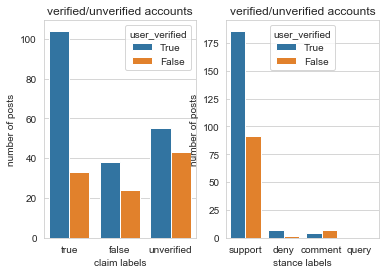

In [46]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
source = data[(data['depth'] == 0)]
sns.countplot(data=source,hue='user_verified',x='label_y',ax=ax[0])
ax[0].set(xlabel='claim labels', ylabel='number of posts', title='verified/unverified accounts')

source = data[(data['depth'] == 0)]
sns.countplot(data=source,hue='user_verified',x='label_x',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='verified/unverified accounts')

fig.show()

/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


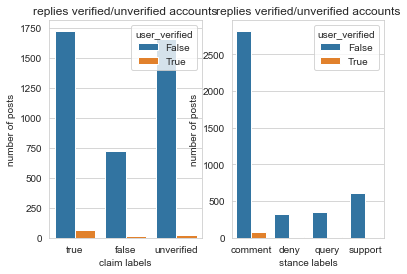

In [45]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
replies = data[(data['source_id'] != data['id_x'])]
sns.countplot(data=replies,x='label_y',hue='user_verified',ax=ax[0])
ax[0].set(xlabel='claim labels', ylabel='number of posts', title='replies verified/unverified accounts')

replies = data[(data['source_id'] != data['id_x'])]
sns.countplot(data=replies,x='label_x',hue='user_verified',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='replies verified/unverified accounts')

fig.show()

/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


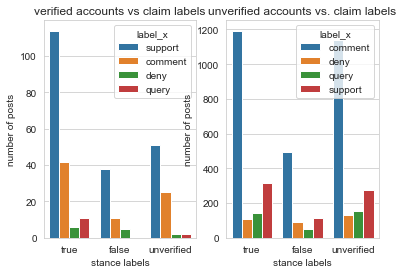

In [43]:
#number of sdqc based on false claims
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
# verified/unverified source accounts
fig, ax =plt.subplots(1,2)
source = data[data['user_verified'] == True]
sns.countplot(data=source,x='label_y',hue='label_x',ax=ax[0])
ax[0].set(xlabel='stance labels', ylabel='number of posts', title='verified accounts vs claim labels')

source = data[data['user_verified'] == False]
sns.countplot(data=source,x='label_y',hue='label_x',ax =ax[1])
ax[1].set(xlabel='stance labels', ylabel='number of posts', title='unverified accounts vs. claim labels')

fig.show()

In [ ]:
#verified accounts who post and support false claims
